In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


In [2]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

# Normalize the pixel values to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the data to add a channel dimension (for CNN)
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
model = keras.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 35ms/step - accuracy: 0.8188 - loss: 0.5040
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.9041 - loss: 0.2603
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 34ms/step - accuracy: 0.9226 - loss: 0.2079
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9382 - loss: 0.1694
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9450 - loss: 0.1448
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9549 - loss: 0.1202
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9646 - loss: 0.0949
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - accuracy: 0.9698 - loss: 0.0819
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9764 - loss: 0.0640
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9809 - loss: 0.0528


In [5]:
loss, acc = model.evaluate(test_images, test_labels)
print("Loss:", loss)
print("Accuracy:", acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9114 - loss: 0.3465
Loss: 0.3396354913711548
Accuracy: 0.9135000109672546


In [6]:
pred = model.predict(test_images)
pred_labels = np.argmax(pred, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


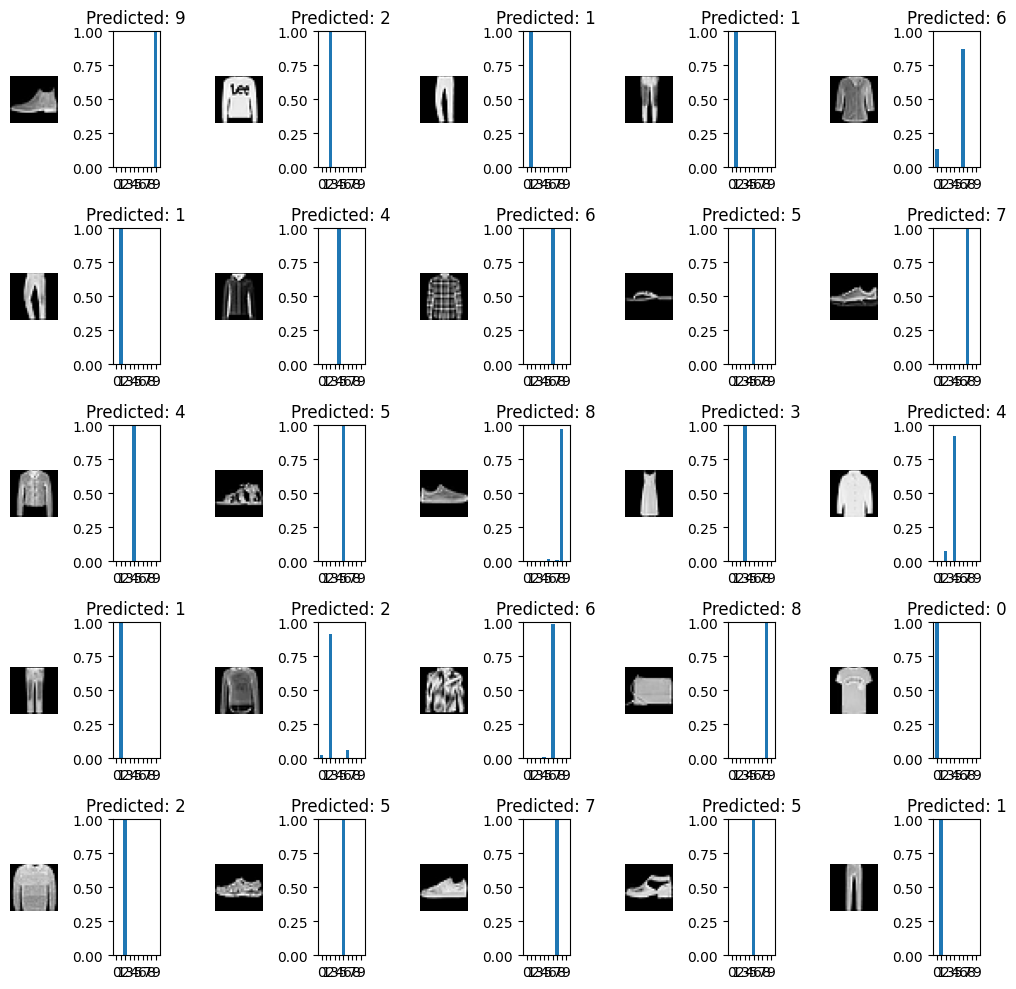

In [7]:
row = 5
col = 5
n_img = row * col

plt.figure(figsize=(2*col, 2*row))

for i in range(n_img):
    plt.subplot(row, 2*col, 2*i + 1)
    plt.imshow(test_images[i].reshape(28,28), cmap='gray')
    plt.axis('off')

    plt.subplot(row, 2*col, 2*i + 2)
    plt.bar(range(10), pred[i])
    plt.xticks(range(10))
    plt.ylim([0, 1])
    plt.title(f"Predicted: {pred_labels[i]}")

plt.tight_layout()
plt.show()
